# **Final Project**

# **Part 1**

**Group #3**

*Audrey Kuo, Alec Brown, Bella Rogers, Jendayia Taylor, Miller Devane, Ramnath Gandhi, Matthew Congiusta*

# **Part 2**
# Neuronal Models

# Integrate-and-Fire Model

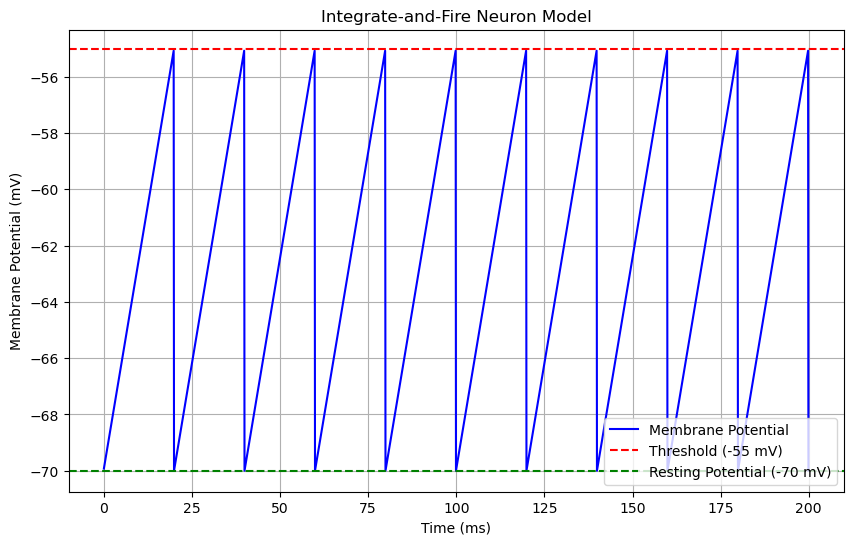

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 200  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = resting_potential  # reset potential set to resting potential
linear_increase_rate = 0.5  # increased linear increase rate (mV/ms per µA of current)

# Input current (constant for simplicity)
input_current = 1.5  # input current (µA)

# Initialize variables
membrane_potential = resting_potential
potential_trace = []

for t in time:
    # Update membrane potential linearly based on input current
    membrane_potential += linear_increase_rate * input_current * dt

    # Check for spike
    if membrane_potential >= threshold_potential:
        membrane_potential = reset_potential  # Reset to resting potential

    # Record potential
    potential_trace.append(membrane_potential)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, potential_trace, label="Membrane Potential", color="blue")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")

plt.title("Integrate-and-Fire Neuron Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
plt.show()

- IF Models (Integrate and Fire)
    - Type of mathematical model that represents how neurons respond to stimuli
    - Simplifies neuronal dynamics and spiking behavior
    - Inputs are integrated and the neuron spikes if a threshold is reached
    - Involves linear increase of membrane potential based on injected current until threshold is reached
    - Output is represented in binary: 0 corresponds to no action potential and 1 corresponds to an action potential
    - Does not incorporate leaky ion channels

Based on the above visualization and prior knowledge of leaky integrate and fire models, the above integrate and fire model is very much an oversimplified representation of a biological neuron's dynamic behavior. This model is binary because it represents the neuron as simply firing or not firing, failing to account for more nuanced elements of a biological neuron such as the various inhibitory and excitatory graded potentials that could possibly affect its firing behavior. One aspect of this model that is most unlike a real biological neuron is the linear increase in membrane potential in response to injected current. This means that it does not have the distinct nonlinear phases of depolarization, overshoot, and repolarization that are commonly found in biological neurons. Another essential missing aspect from the above integrate-and-fire neuron model is the presence of leaky ion channels that cause the leakage of current across the membrane, which is what leads to the nonlinear increase in membrane potential in real biological neurons. The model also does not incorporate the phase of hyperpolarization immediately after a spike, effectively creating a refractory period during which the neuron cannot fire another actional potential. A real biological neuron consists of several components, including dendrites, soma, and axons that are not accounted for in the integrate and fire model. Real biological neurons are also much more dynamic in the sense that they exhibit adaptation, adjusting firing rate when met with sustained input. The aspects that are like biological neurons are the integration of input that causes an increase in membrane potential, the firing of an action potential once threshold is reached, and the return to resting potential.

# Leaky Integrate-and-Fire Model

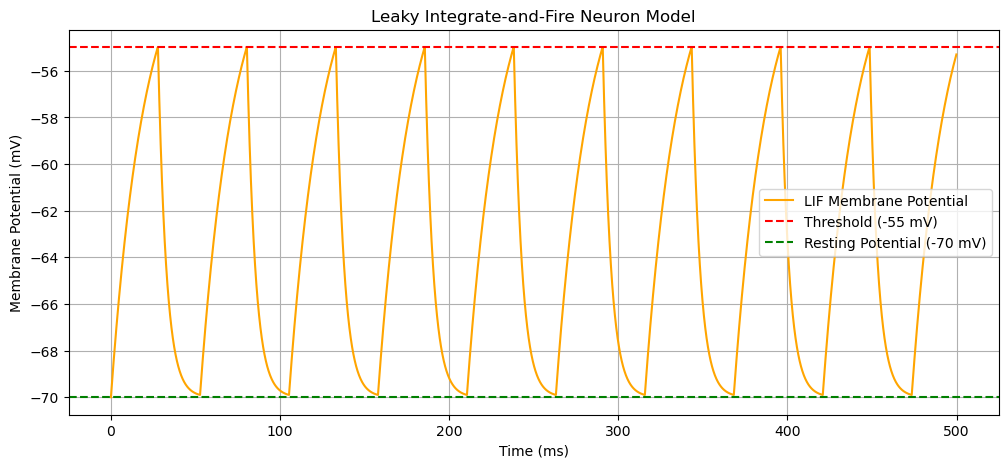

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 500  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = -70  # reset potential (mV)
decay_time = 5  # time constant for decay after spike (ms)

# LIF Model Parameters
tau = 20  # membrane time constant (ms)
resistance = 10  # membrane resistance (MΩ)

# Input current (constant input)
input_current_LIF = 2.0  # µA
low_input_current_LIF = 1.4

# Initialize membrane potential
membrane_potential_LIF = resting_potential
potential_trace_LIF = []
decaying = True  # Flag to indicate if in decay phase
spike_start_time = 0  # When the spike occurred

# Simulation loop
for t in time:
    # --- LIF Model --- #
    if decaying:
        # Gradual decay towards reset potential (exponential decay formula)
        membrane_potential_LIF += (reset_potential - membrane_potential_LIF) * (dt / decay_time)

        # Stop decay when close enough to reset potential
        if membrane_potential_LIF <= reset_potential + 0.1:
            decaying = False  # End decay

    elif membrane_potential_LIF >= threshold_potential:
        # Spike occurs
        decaying = True  # Begin decay
        spike_start_time = t  # Mark when spike happened

    else:
        # Leaky integration: Exponential decay + input current
        membrane_potential_LIF += (resting_potential - membrane_potential_LIF + input_current_LIF * resistance) * dt / tau

    potential_trace_LIF.append(membrane_potential_LIF)


# Plot for LIF Model
plt.figure(figsize=(12, 5))
plt.plot(time, potential_trace_LIF, label="LIF Membrane Potential", color="orange")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("Leaky Integrate-and-Fire Neuron Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
plt.show()

- LIF Models (Leaky Integrate and Fire)
    - Inputs are integrated linearly but with a leak term
    - An action potential occurs if a threshold is reached
    - Involves increase of membrane potential based on injected current until threshold is reached
    - Output is represented in binary: 0 corresponds to no action potential and 1 corresponds to an action potential
    - Includes leaky ion channels, allowing the membrane potential to decay over time, without any additional input
    - More natural decay of membrane potential over time rather than  harsh reset to resting potential seen in I&F model
    - Explains the importance of the leakage of ions across the cell membrane, making it more biologically accurate
than the I&F Model

The standard IF model assumes there is linear increase of membrane potential with an input current. Real neurons though, have passive leaky conductance as a result of leaky ion channels, which causes input current to continuously leak out through the membrane of the neuron. The leaky integrate-and-fire model reflects this aspect of biological neurons. This means that the most important change we had to make to update the model was to ensure that the increase of membrane potential to reach the threshold is nonlinear. In addition, after the threshold is reached and an action potential is fired, we needed to make sure that the decrease in membrane potential towards resting potential was nonlinear, instead of immediate like in the original I&F model. This reflects the more natural and gradual decay in membrane potential over a few miliseconds after an action potential as a result of the leaky ion channels being incorporated into this model. However, there are still a range of limitations due to leaky integrate-and-fire models not representing all aspects of a biological neuron. For instance, the LIF model still requires an artificial spike generator mechanism to fire an action potential every time threshold is reached. The integrator simply resets back to resting potential after threshold is reached and does not have the capability of firing an action potential on its own. The most important missing aspect from the LIF model is the absence of voltage-gated ion channels.

- In regard to the code, these changes were implemented by adding an exponential function for decay towards resting potential after an action potential is reached.
  "if decaying:
        # Gradual decay towards reset potential (exponential decay formula)
        membrane_potential_LIF += (reset_potential - membrane_potential_LIF) * (dt / decay_time)

        # Stop decay when close enough to reset potential
        if membrane_potential_LIF <= reset_potential + 0.1:
            decaying = False  # End decay"
  We also incorporated the idea of leaky integration, meaning that the inputs are summed linearly, but there is a leak term involved that causes the ultimate increase in membrane potential to be nonlinear. This was done by adding the following code:
  "    else:
        # Leaky integration: Exponential decay + input current
        membrane_potential_LIF += (resting_potential - membrane_potential_LIF + input_current_LIF * resistance) * dt / tau"
  

- Hodgkin-Huxley Model
    - Type of mathematical model that represents the electrical properties of neurons 
    - Describes what happens to the membrane potential and ionic currents during an action potential
    - Includes voltage-gated ion channels for sodium (Na+) and potassium (K+), as well as a leaky channels
    - It models the cell membrane as an circuit with capacitance and multiple conductances
    - Includes four coupled differential equations that determines the changes in membrane potential and the variables representing ion channels
    - Gives a detailed and accurate representation of neuronal spiking

# Simple Feed-Forward Neural Network

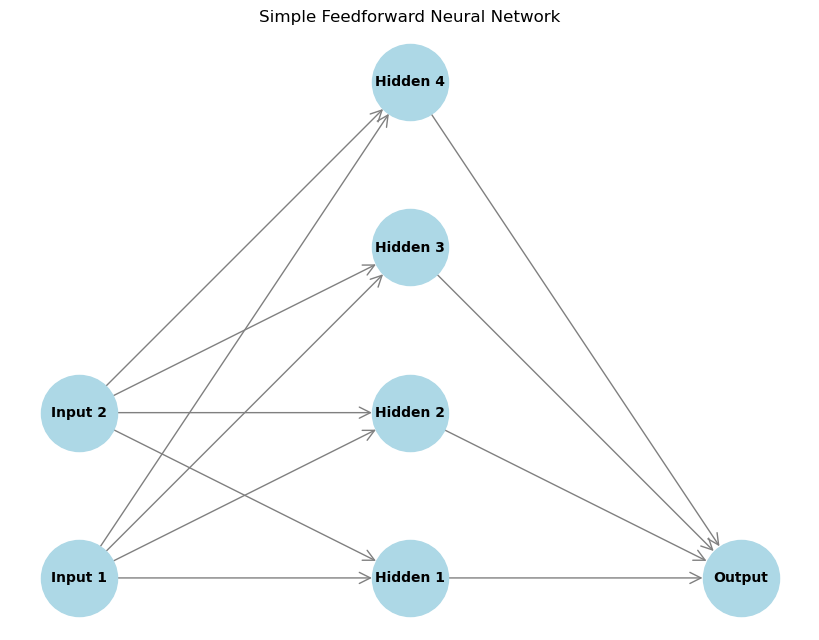

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network():
    G = nx.DiGraph()  # Directed graph to add arrows

    # Number of nodes in each layer
    input_layer = ['Input 1', 'Input 2']  # 2 input neurons
    hidden_layer = [f'Hidden {i+1}' for i in range(4)]  # 4 hidden neurons
    output_layer = ['Output']  # 1 output neuron

    # Add nodes to the graph
    G.add_nodes_from(input_layer + hidden_layer + output_layer)

    # Add edges between layers (fully connected)
    for input_node in input_layer:
        for hidden_node in hidden_layer:
            G.add_edge(input_node, hidden_node)
    for hidden_node in hidden_layer:
        for output_node in output_layer:
            G.add_edge(hidden_node, output_node)

    # Positioning the nodes
    pos = {}
    layer_spacing = 2
    y_offset = 0

    # Define positions for input, hidden, and output layers
    for i, node in enumerate(input_layer):
        pos[node] = (0, i * layer_spacing)
    for i, node in enumerate(hidden_layer):
        pos[node] = (1, i * layer_spacing - y_offset)
    for i, node in enumerate(output_layer):
        pos[node] = (2, i * layer_spacing)

    # Draw the network with arrows (directed edges)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", arrows=True, arrowstyle='->', arrowsize=20)
    plt.title('Simple Feedforward Neural Network')
    plt.show()

# Call the function to plot the network
plot_neural_network()


- Simple Neural Network (Feed-Forward)
    - Form of artificial intelligence
    - Computational model inspired by human brain
    - Interconnected layers of nodes for data processing like classification and regression, especially in machine learning
    - Generally consists of input layer, hidden layer, and output layer

The simple feedforward neural network model above is an example of a multilayer perceptron. Its functioning exhibits similarities to a biological neuron. The hidden layers represent dendrites on a postsynaptic neuron, as they integrate and process several presynaptic inputs to determine what the output will be. In this case, the output refers to whether or not an action potential will fire. Since this is a feedforward circuit, it can also be described as an open loop. In this case, the controller models the dendrites of a biological neuron, which receive and integrate the inputs. The actuator, the device that actually does the actual final output action, represents the axon hillock of a biological neuron, since this is where inputs are summed and an action potential eventually fires if threshold is reached. An advantage of neural network models is that because of backpropagation, models can tweak the weights of the nodes within the network based on error. This models the mechanisms of long-term depression and potentiation in real biological neurons. However, some limitations of a simple neural network as a model in comparison to a biological neuron include that it does not consider the biochemical and electrochemical nuances of synaptic dynamics, such as the presence of leaky ion channels that affect the depolarization and hyperpolarization of the cell membrane or the ion currents involved. A neural network also does not incorporate the necessary elements to describe the refractory period that occurs after the firing of every action potential. As such, neural network models also do not refelct the temporal dynamics of a biological neuron, as their functioning depends solely on the processing speed of the computer being used. In general, nodes of a neural network are very oversimplified versions of the parts and functioning of biological neurons.

# **Part 3**
# Discussion and Comparison of Models
The Integrate-and-Fire (I&F) model is a simple neuronal model where a neuron sums graded potentials linearly and fires an action
potential once its membrane potential reaches a threshold, making it computationally efficient
but biologically unrealistic due to its abrupt reset to membrane potential after the firing of each action potential. A benefit of this model is that it uses less computational energy, so it is useful for simulating basic neuronal
spiking behavior. However, a limitation of I&F models is that they fall short due to their ignorance of continuous sub-threshold dynamics and
its failure to account for leaky ion channels. They are different from other neuronal models because it is the most simple model, in which integration of graded potentials is represented linearly. Similarly, the Leaky Integrate-and-Fire (LIF) model
improves realism by allowing the membrane potential to decay over time, though it still requires
an artificial spike generator. Thus, it is more biologically realistic than I&F but still does not
include certain aspects like voltage-gated channels. The Hodgkin-Huxley (HH) model is the
most biologically accurate. It is different from other neuronal models because it is the only one that incorporates voltage-gated ion channels to simulate action
potentials dynamically, but a limitation is that it is computationally expensive. A benefit of HH models is that they can explain ionic currents
dynamically and action potential propagation, but they are still limited due to the assumption of uniform ionic behavior across
the neuron, which isn’t always accurate. Artificial Neural Networks (ANNs), inspired by biological
neurons, process inputs through multiple layers, enabling learning and adaptation but requiring
significant computational resources. They can model complex nonlinear relationships but are
not explicitly based on biological neurons, just inspired by them. Artificial neural networks are the most distinct type of neuronal model. This is becuase they are a form of artificial intelligence. Not only can they symbolize action potential firing behavior of a single neuron, but they can also describe the interactions between multiple neurons, especially regarding mechanisms such as convegence. They also allow for the most flexibility in terms of varying the complexity of networks and therefore, the neurons being represented. For instance, the number of nodes and hidden layers can vary, with the complexity and bits of information being contained in the model increasing as the number of hidden layers increase. In addition, backpropagation is a form of error correction that can be applied to artificial neural networks, in which the weights of the network can be adjusted after testing according to error. This models the mechanisms of long-term potentiation and depression seen in biological neurons.

Information theory within applied mathematics studies how information can be quantified, stored, and communicated, with signals typically disregarding context/meaning. A bit (“binary digit”) is a unit of measuring the amount of information (e.g. binary answers) needed to determine an answer to a single question: 1 bit represents the amount of information needed to distinguish between two equally likely outcomes. Shannon’s entropy allows for comparison of amounts of information and is the amount of uncertainty or randomness involved in the value of a variable or process. It is a useful equation to establish coding efficiency: more entropy means more uncertainty and more bits required to distinguish an answer. From an Information Theory
perspective, I&F is the most concise, encoding information in binary (0 or 1), followed by LIF models, while HH and
ANNs store more information with higher complexity and therefore more bits. The LIF model has lower entropy and fewer bits than the HH model, but higher entropy and more bits than the I&F model. The HH model contains more bits because of the complexity of the model and because it is so unpredictable. It uses nonlinear equations and encodes membrane and ion channels, including leaky ion channels. The HH model also has high Shannon’s entropy because it is biological accurate,(models ion channels explicitly), takes in the most parameters, and involves continuous equations and more variability. HH balances realism with
computational cost, whereas ANNs maximize information capacity at the expense of biological
fidelity. ANNs tend to have the highest Shannon's entropy and number of bits of information because there can be hundreds of nodes and hidden layers that all affect what the output could be, meaning that this model is the most unpredictable and holds the largest amount of information, though the exact value depends on the amount of hidden layers in the specific neuronal model.

# **Part 4**

# Leaky Integrate-and-Fire Model with Differing Inputs

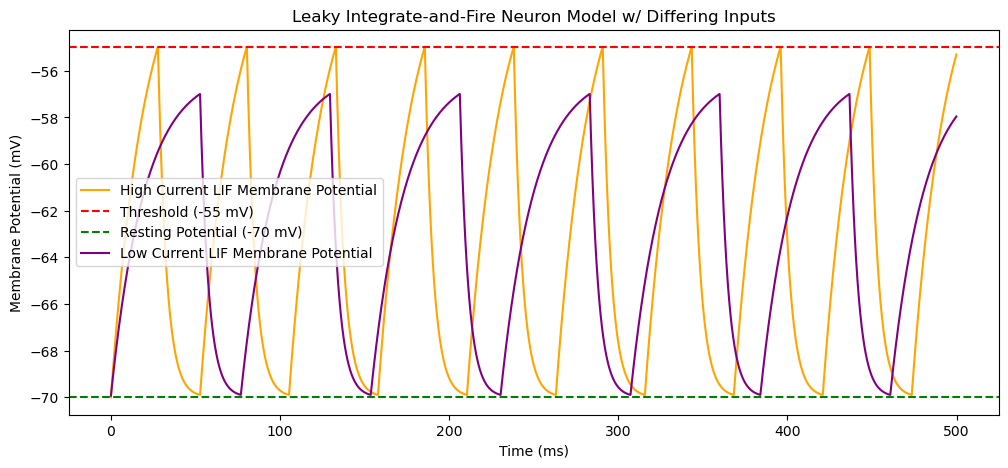

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 500  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = -70  # reset potential (mV)
decay_time = 5  # time constant for decay after spike (ms)

# LIF Model Parameters
tau = 20  # membrane time constant (ms)
resistance = 10  # membrane resistance (MΩ)

# Input current (constant input)
input_current_LIF = 2.0  # µA
low_input_current_LIF = 1.4

# Initialize membrane potential
membrane_potential_LIF = resting_potential
low_potential_trace_LIF = []
decaying = False  # Flag to indicate if in decay phase
spike_start_time = 0  # When the spike occurred

# Simulation loop
for t in time:
    # --- Decreased Current LIF Model --- #
    if decaying:
        # Gradual decay towards reset potential (exponential decay formula)
        membrane_potential_LIF += (reset_potential - membrane_potential_LIF) * (dt / decay_time)

        # Stop decay when close enough to reset potential
        if membrane_potential_LIF <= reset_potential + 0.1:
            decaying = False  # End decay

    elif membrane_potential_LIF >= threshold_potential - 2:
        # Spike occurs
        decaying = True  # Begin decay
        spike_start_time = t  # Mark when spike happened

    else:
        # Leaky integration: Exponential decay + input current
        membrane_potential_LIF += (resting_potential - membrane_potential_LIF + low_input_current_LIF * resistance) * dt / tau

    low_potential_trace_LIF.append(membrane_potential_LIF)


# Plot for LIF Model
plt.figure(figsize=(12, 5))
plt.plot(time, potential_trace_LIF, label="High Current LIF Membrane Potential", color="orange")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("Leaky Integrate-and-Fire Neuron Model w/ Differing Inputs")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
# Plot Low Current LIF Results
plt.plot(time, low_potential_trace_LIF, label="Low Current LIF Membrane Potential", color="purple")
plt.legend()
plt.grid()
plt.show()

In the original leaky integrate-and-fire neuron model, the inject current was kept at a constant high rate of 2.0 Amperes, which meant that there was consistently enough input for the membrane potential to be depolarized and reach threshold, resulting in an action potential. The change that was made to the inputs, codewise, was that the variable "input_current_LIF = 2.0" was changed to "low_input_current_LIF = 1.4". In the model, this effectively decreased the injected current from 2.0 A to 1.4 A, resulting in there not being enough inputs summed for the membrane potential to ever reach threshold or fire an action potential. This edit to the code also changed the visualization because the lower current slowed the increase in membrane potential, resulting in a smaller upwards slope. Another aspect of the code that was changed along with the value of the injected current was changing "elif membrane_potential_LIF >= threshold_potential" to "elif membrane_potential_LIF >= threshold_potential - 2". These changes in the code resulted in the changes seen in the visualization because this ensures that the neuron never fires an action potential since the leaky channels cause the membrane potential to decay before it reaches threshold. 

# **Part 5**
# Leaky Integrate-and-Fire Model with Differing Inputs

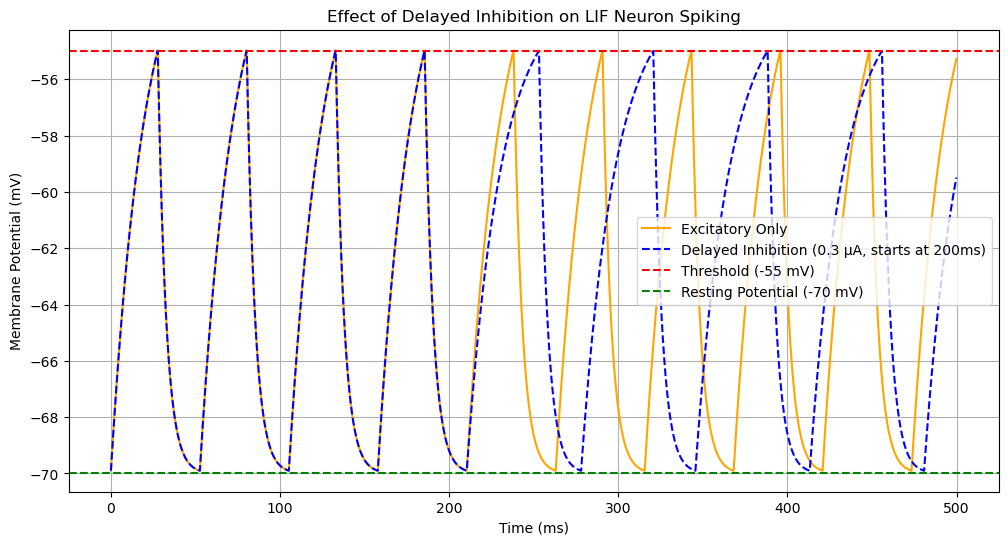

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 500  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = -70  # reset potential (mV)
decay_time = 5  # time constant for decay after spike (ms)

# LIF Model Parameters
tau = 20  # membrane time constant (ms)
resistance = 10  # membrane resistance (MΩ)

# Input currents
excitatory_current = 2.0  # µA (original input)
inhibitory_current_further_adjusted = 0.3  # µA, weaker inhibition
inhibition_delay = 200  # Delay inhibition onset by 200 ms

# Initialize membrane potentials
membrane_potential_excitatory = resting_potential
membrane_potential_inhibitory_delayed = resting_potential
potential_trace_excitatory = []
potential_trace_inhibitory_delayed = []

decaying_excitatory = False
decaying_inhibitory_delayed = False

# Simulation loop
for t in time:
    # Excitatory Only
    if decaying_excitatory:
        membrane_potential_excitatory += (reset_potential - membrane_potential_excitatory) * (dt / decay_time)
        if membrane_potential_excitatory <= reset_potential + 0.1:
            decaying_excitatory = False
    elif membrane_potential_excitatory >= threshold_potential:
        decaying_excitatory = True
    else:
        membrane_potential_excitatory += (resting_potential - membrane_potential_excitatory + excitatory_current * resistance) * dt / tau
    potential_trace_excitatory.append(membrane_potential_excitatory)

    # Delayed Inhibition
    net_current_delayed = excitatory_current if t < inhibition_delay else excitatory_current - inhibitory_current_further_adjusted
    
    if decaying_inhibitory_delayed:
        membrane_potential_inhibitory_delayed += (reset_potential - membrane_potential_inhibitory_delayed) * (dt / decay_time)
        if membrane_potential_inhibitory_delayed <= reset_potential + 0.1:
            decaying_inhibitory_delayed = False
    elif membrane_potential_inhibitory_delayed >= threshold_potential:
        decaying_inhibitory_delayed = True
    else:
        membrane_potential_inhibitory_delayed += (resting_potential - membrane_potential_inhibitory_delayed + net_current_delayed * resistance) * dt / tau
    
    potential_trace_inhibitory_delayed.append(membrane_potential_inhibitory_delayed)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(time, potential_trace_excitatory, label="Excitatory Only", color="orange")
plt.plot(time, potential_trace_inhibitory_delayed, label="Delayed Inhibition (0.3 µA, starts at 200ms)", color="blue", linestyle="--")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("Effect of Delayed Inhibition on LIF Neuron Spiking")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
plt.show()

The graph titled "Effect of Delayed Inhibition on LIF Neuron Spiking" shows how an inhibition input would affect a Leaky Integrate and Fire Model. The specific changes to the code we made to show the inhibition input starts off by defining when the inhibition starts. In our case was at 200 ms with this code added on: (net_current_delayed = excitatory_current if t < inhibition_delay else excitatory_current - inhibitory_current_further_adjusted). This part ensures that inhibition is only applied after 200 ms, which is why we see a change in spiking behavior at this point in the graph. Lastly, there was a change in the formula used to modulate the membrane potential; (membrane_potential_inhibitory_delayed += (resting_potential - membrane_potential_inhibitory_delayed + net_current_delayed * resistance) * dt / tau). This shows that before 200 ms the excitatory input dominates and the neuron fires normally. Then after the inhibitory input was subtracted, slowing the rate at which the membrane potential reaches the threshold we also see fewer spikes. This delayed inhibition mimics a real neuronal circuit where the inhibition is time-dependent, affecting the spike timing and in the end affecting the network activity.

# **Part 6**
# Lateral Inhibition
Lateral inhibition is a neural process where the stimulation and resulting firing activity of one excited neuron reduces the activity of neighboring neurons by inhibiting it. Below is a visual representation of lateral inhibition as it applies to microcircuit format. [This resource](https://link.springer.com/referenceworkentry/10.1007/978-0-387-79948-3_1379) may help with a general understanding of the definition of lateral inhibition.


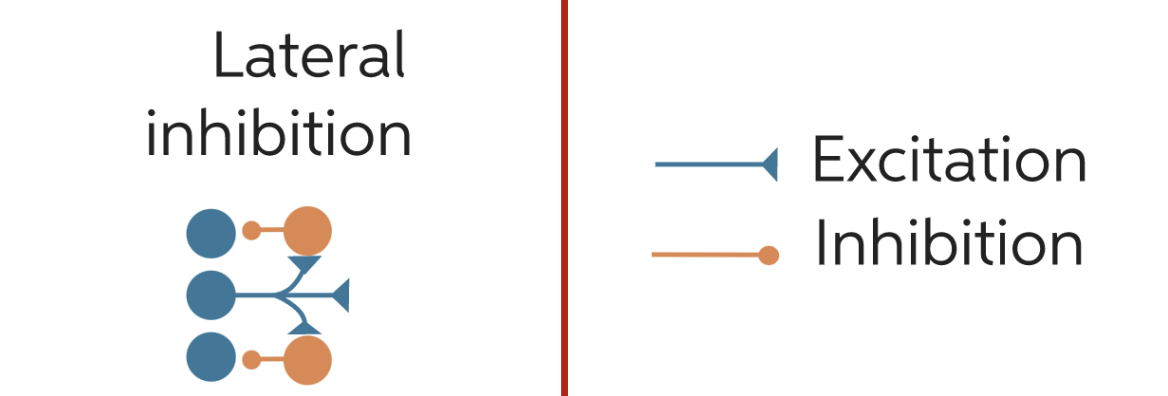

When applied to the human visual system, due to the silencing of neighboring neurons, lateral inhibition enhances contrasts and sharpness in sensory perception, making stimuli stand out more clearly. The process of lateral inhibition is commonly found in the vision system, especially the [primary visual cortex](https://pmc.ncbi.nlm.nih.gov/articles/PMC10680635/), as it allows for greater clarity. In the retina, the increased contrasts allows the distinguishing of light and dark areas in objects and limits blurring. When examining the neural mechanism of lateral inhibition of the vision system, light first enters the retina where photoreceptors, cones and rods, detect it. The strength of activation of the photoreceptors is determined by the intensity of the light. The activated photoreceptors are hyperpolarized and decrease the release of glutamate. This signal is then transmitted to bipolar cells. Depending on the function of the bipolar cell, it will either be inhibited or activated by light. Due to lateral inhibition, bipolar cells receive a stronger signal contrast between activated and inhibited photoreceptors. Such causes a more pronounced contrast between light and dark areas. Additionally, strongly activated photoreceptors excite horizontal cells that inhibit less stimulated photoreceptors. Such causes an enhanced contrast between light and dark areas. Ganglion cells then take the input from bipolar cells and further process the contrast. This step aids in the detection of edges, brightness, and spatial patterns. In other words, this mechanism serves to reduce noise. Lastly, the ganglion cells send the processed signals through the optic nerve to the lateral geniculate nucleus in the thalamus, where the image is interpreted. In summary, lateral inhibition in vision enhances contrast by allowing strongly activated photoreceptors to suppress the activation of adjacent receptors, creating a clear visual perception. [This article](https://brainstuff.org/blog/how-does-lateral-inhibition-in-the-visual-system-work) and [this article](https://genemod.net/blog/how-lateral-inhibition-shapes-visual-perception) provide useful information describing lateral inhibition specifically as it applies to the visual cortex. Below is an example depicting lateral inhibition as it applies to human photoreceptor cells in the visual system.

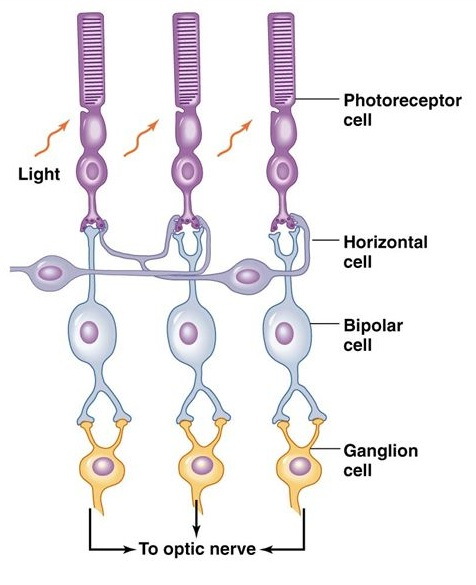

The research papers below may also provide more information on the applications of lateral inhibition in the visual system:

[Retinal Lateral Inhibition and High Contrast Sensitivity](https://medcraveonline.com/AOVS/retinal-lateral-inhibition-an-important-mechanism-for-sharp-vision-and-color-discrimination-with-high-contrast-sensitivity.html)

[Spatial Induction](https://pmc.ncbi.nlm.nih.gov/articles/PMC5193432/)